# Ecomerce 
## In this model we are working on a Ecomerce app and website which deals in Cloths and they have Desginer on offline store, where a coustmer can discuss about there desgine of cloths and place order from home via Mobile app or via website and in this Data our work is to identify or to give prediction to company about where they have to pay more efforts for company growth.  

## Import library and Data Collection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
ecomerce_df = pd.read_csv('Ecommerce Customers.csv')
ecomerce_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Information On Data

In [4]:
ecomerce_df.info()
# 500(0 to 499) row and 8 column (0 to 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
# it will give you statistics value
ecomerce_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratry Data Analysis EDA

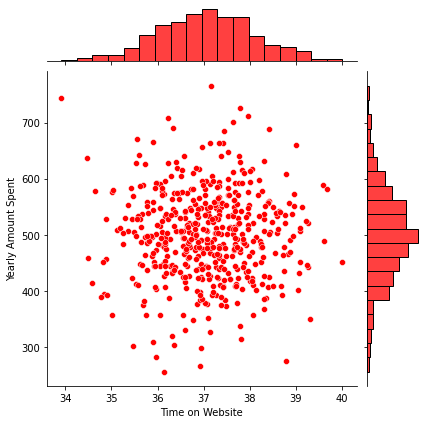

In [10]:
# Joinplot is use for relate the two features together and see the relation between the 2 features how they are related to each other
sns.jointplot(data=ecomerce_df,x='Time on Website',y='Yearly Amount Spent',color='red')

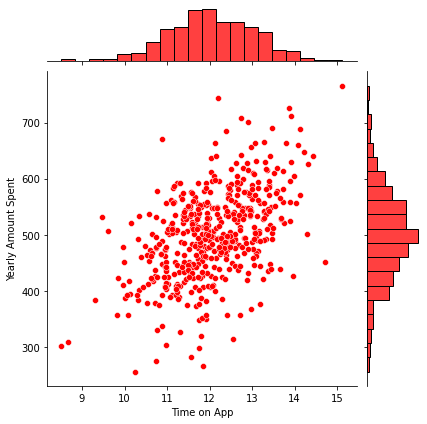

In [11]:
sns.jointplot(data=ecomerce_df,x='Time on App',y='Yearly Amount Spent',color='red')

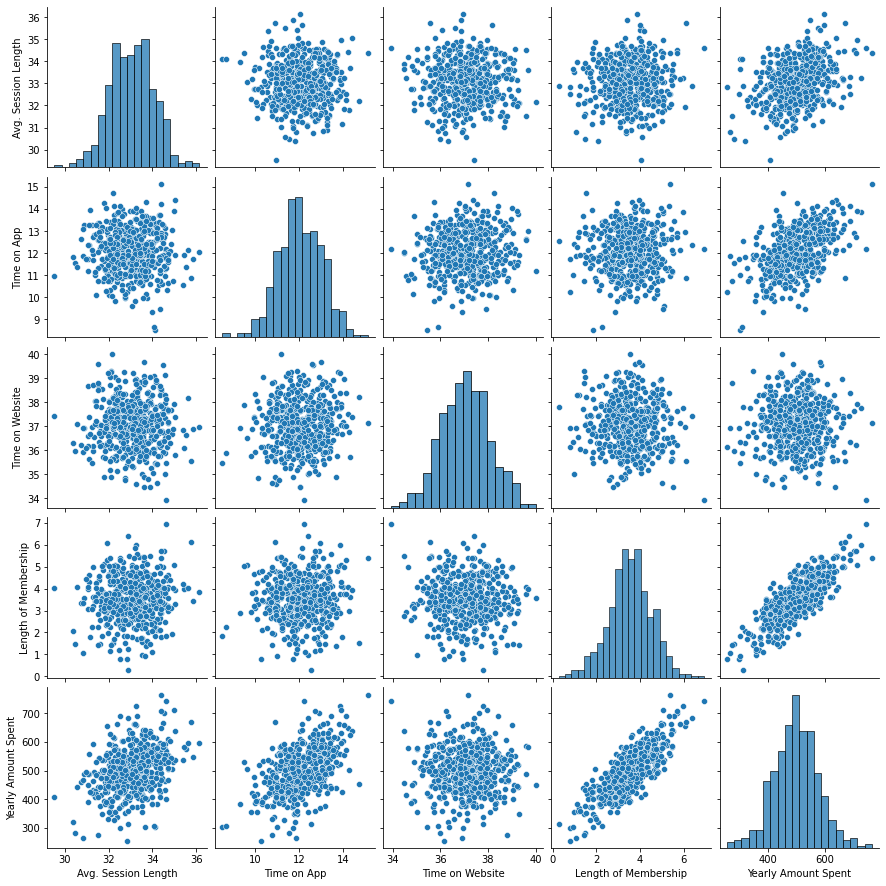

In [12]:
sns.pairplot(data=ecomerce_df)

### here in this EDA or Pairplot we can say that yearly amount spent is highly corelated with length of membership as well as there is corelation between time on mobile app and yearly annual spend is also corelated to each other.

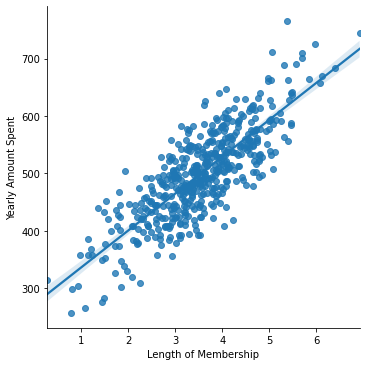

In [14]:
# create a linear plot on yearly amount spent with length of membership
# linear plot
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data = ecomerce_df)

# Train and test data

In [16]:
ecomerce_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
X = ecomerce_df[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
y = ecomerce_df['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
## Train our Model on Training Data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

## fit training data into Linear Model

In [22]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [23]:
# cofficent of model
lin_reg.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [24]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [31]:
df_coef = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coeff'])
df_coef

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [36]:
# Predicting Test Data
predict = lin_reg.predict(X_test)
predict

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [38]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [42]:
# Compare acctual value to predict value
cmpr_val = predict - y_test
cmpr_val

18     4.126186
361    1.686918
104   -0.816457
4     -7.975058
156    3.858503
         ...   
147   -1.431172
346   -3.977230
423   -3.521249
17     3.822028
259    0.080551
Name: Yearly Amount Spent, Length: 150, dtype: float64

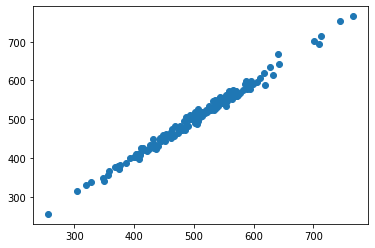

In [43]:
# So here we got a best fit line and model is doing well
plt.scatter(y_test,predict)

# Evaluting the Model
1. Mean Absolute Error(MAE)  =   Actual - Predicted  = result
2. Mean Squared Error(MSE)   =   result ** 2
3. Root meanSquared Error(RMSE)  = root of Mean Squared Error

For create the best Model we have to mimimize this Error Because as much as this error is less you got best prediction and a best fitted line for data point. 

In [47]:
from sklearn import metrics
# MAE
mean_absolute_error = metrics.mean_absolute_error(y_test,predict)
# MSE
mean_square_error = metrics.mean_squared_error(y_test,predict)
# RMSE
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test,predict))
print([mean_absolute_error,mean_square_error,root_mean_square_error])

[7.228148653430828, 79.81305165097427, 8.933815066978624]


## R_Squared - Statistics

In [50]:
"In Statistics this term in known as R square and it can be chack via this method for check the model is good fited or not "
metrics.explained_variance_score(y_test,predict)

0.9890771231889606

/home/nikhil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

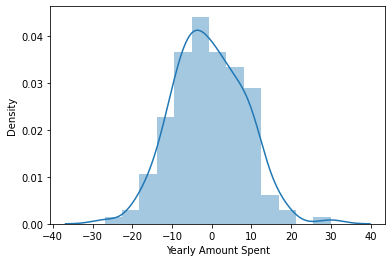

In [51]:
# So its Following Normal Distribution
sns.distplot((y_test-predict))

In [ ]:
# # Building the model
# m = 0
# c = 0

# L = 0.0001  # The learning Rate
# epochs = 1000 
# n = float(len(predict))

# for i in range(epochs): 
#     y_test = m*predict + c  # The current predicted value of Y
#     D_m = (-2/n) * sum(predict * (Y - Y_pred))  # Derivative wrt m
#     D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
#     m = m - L * D_m  # Update m
#     c = c - L * D_c  # Update c
    
# print (m, c)